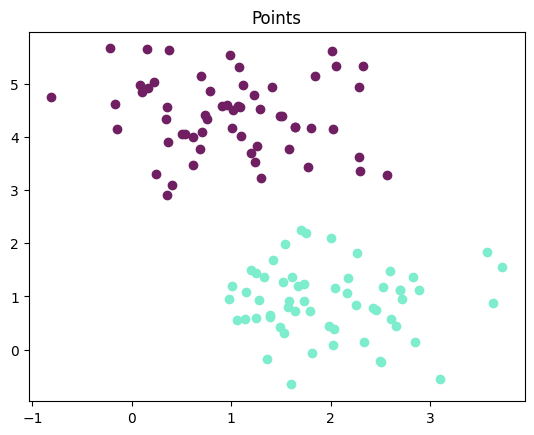

In [93]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

n_samples = 117
n_class = 2

# Генерація точок
x_set, y_true = make_blobs(n_samples=n_samples, centers=n_class, cluster_std=0.7, random_state=0)

plt.figure()
colors = ["#6f1f62", "#7dedce"]

for k, col in enumerate(colors):
    cluster_data = y_true == k
    plt.scatter(x_set[cluster_data, 0], x_set[cluster_data, 1], c=col, marker='o')

plt.title("Points")
plt.show()

In [94]:
from sklearn.model_selection import train_test_split

# Розділення на навчальну і тестову вибірки
X_train, X_test, Y_train, Y_test = train_test_split(x_set, y_true, test_size=0.15, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 99
Test set size: 18


Initial weights: [-0.15687255 -0.23489464] Initial bias: [-0.23889926]
Updated weights: [ 34.67754307 -33.1644531 ] Updated bias: [17.52696923]


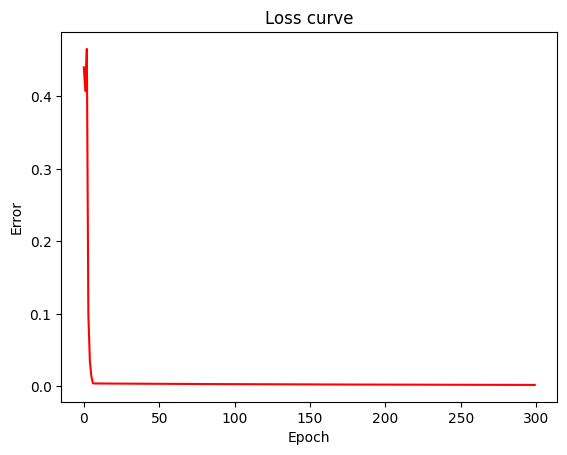

In [95]:
import numpy as np

# Ініціалізація ваг та зміщення
weights = np.random.rand(2) - 0.5
bias = np.random.rand(1) - 0.5
print("Initial weights:", weights, "Initial bias:", bias)

def logistic(x):
    return 1 / (1 + np.exp(-x))

# Функція для обчислення виходу мережі
def net(w, b, x):
    inp = np.dot(x, w) + b
    out = logistic(inp)
    return out

# Навчання персептрону за правилом Відроу-Хоффа
lr = 0.3  # Швидкість навчання
err = []

def train(train_points, train_outs, epoch, weights, bias):
    for i in range(epoch):
        output = net(weights, bias, train_points)
        error = train_outs - output
        delta = lr * np.dot(error, train_points)
        weights += delta
        bias += lr * np.dot(error, np.ones(train_points.shape[0]))
        err.append(np.mean(np.abs(error)))
    return weights, bias

epochs = 300
trained_w, trained_b = train(X_train, Y_train, epochs, weights, bias)
print("Updated weights:", trained_w, "Updated bias:", trained_b)
plt.plot(err, color='r')
plt.title("Loss curve")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.show()

In [96]:
def predict(x, w, b):
    out = np.round(net(w, b, x))
    return out.astype(int)

y_pred = predict(X_test, trained_w, trained_b)

print("Test:")
for i in range(X_test.shape[0]):
    print("Input:", X_test[i], "| Prediction:", y_pred[i], "| Target:", Y_test[i])

Test:
Input: [2.52587385 1.18288695] | Prediction: 1 | Target: 1
Input: [-0.21811905  5.6693301 ] | Prediction: 0 | Target: 0
Input: [1.58323466 0.91994505] | Prediction: 1 | Target: 1
Input: [1.06510854 4.58517988] | Prediction: 0 | Target: 0
Input: [2.25121474 0.82895839] | Prediction: 1 | Target: 1
Input: [0.09931333 4.84803058] | Prediction: 0 | Target: 0
Input: [1.40612564 4.949332  ] | Prediction: 0 | Target: 0
Input: [ 2.50335959 -0.23420557] | Prediction: 1 | Target: 1
Input: [1.75066004 2.19214827] | Prediction: 1 | Target: 1
Input: [2.88688838 1.11952349] | Prediction: 1 | Target: 1
Input: [1.83747356 5.14545322] | Prediction: 0 | Target: 0
Input: [0.242283   3.30977477] | Prediction: 0 | Target: 0
Input: [ 3.1014067  -0.55132586] | Prediction: 1 | Target: 1
Input: [1.05842489 0.55233974] | Prediction: 1 | Target: 1
Input: [1.23976795 3.53420677] | Prediction: 0 | Target: 0
Input: [0.95654252 4.60361964] | Prediction: 0 | Target: 0
Input: [0.73273157 4.41323161] | Prediction:

In [97]:
print("Train:")
for i in range(X_train.shape[0]):
    train_pred = np.round(net(trained_w, trained_b, X_train[i])).astype(int)
    print("Input:", X_train[i], "| Prediction:", train_pred, "| Target:", Y_train[i])

Train:
Input: [0.34116122 4.3401491 ] | Prediction: [0] | Target: 0
Input: [1.13413233 0.57455444] | Prediction: [1] | Target: 1
Input: [2.03823923 0.38104202] | Prediction: [1] | Target: 1
Input: [1.10046838 4.02254067] | Prediction: [0] | Target: 0
Input: [2.01804661 5.63090975] | Prediction: [0] | Target: 0
Input: [2.42156118 0.77758123] | Prediction: [1] | Target: 1
Input: [2.04335323 1.16306987] | Prediction: [1] | Target: 1
Input: [1.50899649 4.38895984] | Prediction: [0] | Target: 0
Input: [1.70664481 2.2483361 ] | Prediction: [1] | Target: 1
Input: [1.64133197 4.19783728] | Prediction: [0] | Target: 0
Input: [1.15026768 1.08459927] | Prediction: [1] | Target: 1
Input: [0.90401688 4.59120628] | Prediction: [0] | Target: 0
Input: [1.01138721 1.20523785] | Prediction: [1] | Target: 1
Input: [0.61951355 3.99713532] | Prediction: [0] | Target: 0
Input: [1.38610602 0.65547642] | Prediction: [1] | Target: 1
Input: [1.51632627 1.27513809] | Prediction: [1] | Target: 1
Input: [2.2640342

In [98]:
true_positive = np.sum((Y_test == 1) & (y_pred == 1))
false_negative = np.sum((Y_test == 1) & (y_pred == 0))
false_positive = np.sum((Y_test == 0) & (y_pred == 1))
true_negative = np.sum((Y_test == 0) & (y_pred == 0))

print("TP:", true_positive, "FN:", false_negative, "\nFP:", false_positive, "TN:", true_negative)

TP: 8 FN: 0 
FP: 0 TN: 10


In [99]:
def accuracy(y_true, y_pred):
    accuracy_ = (true_positive + true_negative)/(true_positive + true_negative + false_positive + false_negative)
    print("Accuracy:", accuracy_)
    correct = np.sum(y_true == y_pred)
    total = y_true.shape[0]
    return correct / total

def precision():
    return true_positive / (true_positive + false_positive)

def recall():
    return true_positive / (true_positive + false_negative)

def f1_score():
    precision_ = precision()
    recall_ = recall()
    return 2 * precision_ * recall_ / (precision_ + recall_)

def report(y_true, y_pred):
    print("Classification Report")
    print("Accuracy:", accuracy(y_true, y_pred))
    print("Precision:", precision())
    print("Recall:", recall())
    print("F1-score:", f1_score())

report(Y_test, y_pred)

Classification Report
Accuracy: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
